In [39]:
from illustris import getGalaxy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from __future__ import division
from sklearn.preprocessing import StandardScaler
from matplotlib import gridspec
%matplotlib inline

In [2]:
# Getting data from a particular galaxy (from online)
def getData(index):
    # Here we pick which kinds of particles we want (0-gas, 4-stars)
    # and what information about them 
    # (see http://www.illustris-project.org/data/docs/specifications/)
    fields=[
        [4,'Coordinates'],
        [4,'Velocities'],
        [4,'Masses'],
        [4,'GFM_StellarPhotometrics'],
        [4,'GFM_StellarFormationTime'],
        [0,'Coordinates'],
        [0, 'Volume']
    ]
    # Here we actually pull the data from online

    data=getGalaxy(index,fields)
    
    return data


# A few useful functions to build from

# given the position and masses of the stars finds their center of mass
def findCenterMass(rStar,mStar):
    com=np.zeros(3)
    for i in range(3):
        com[i]=np.sum(rStar[:,i]*mStar[:])/np.sum(mStar[:])
    return com

# given the position and masses of the stars, some number of pixels and some distance finds
# the projected total mass
def findPixels(coordinates,attribute,nPixels,span):
    pixels=np.zeros((nPixels,nPixels))
    for i in range(nPixels):
        for j in range(nPixels):
            inPix=np.argwhere((span*(((2*i)/nPixels)-1)<coordinates[:,0])
                            &(span*(((2*j)/nPixels)-1)<coordinates[:,1])
                         &(span*(((2*(i+1))/nPixels)-1)>coordinates[:,0])
                         &(span*(((2*(j+1))/nPixels)-1)>coordinates[:,1]))
            if inPix.size==0:
                continue
            pixels[i,j]=np.sum(attribute[inPix])
    return pixels

# Moving all the co-ordinates such that the galaxy's centered on (0,0,0)
def com(mStar, rStar):
    nStar=len(mStar)
    com=findCenterMass(rStar,mStar) # finds the center of mass
    rStar=rStar-com # recenters all positions around the center of mass
    return (com, rStar)

# finds the distance between every particle and the origin
def density(nStar, rStar):
    rSquared=np.zeros(nStar)
    for i in range(3):
        rSquared+=rStar[:,i]**2
    r=np.sqrt(rSquared) 
    
    # finds all particles in each of a series of radial bins,
    # finds the total mass in that bin and divides by the volume
    nBins=16
    rMax=16
    rBins=np.linspace(0,rMax,nBins+1)
    density=np.zeros(nBins)
    for i in range(nBins):
        inBin=np.argwhere((r>rBins[i]) & (r<rBins[i+1]))
        if inBin.size==0:
            continue
        density[i]=np.sum(mStar[inBin])/(4*np.pi*(np.power(rBins[i+1],3) - np.power(rBins[i],3))/3)
    return density

In [3]:
#Spiral Galaxy 15

data_15=getData(15)

# And here we put it into simple numpy arrays to work with
rStar_15=data_15[0][:,:]
mStar_15=data_15[2][:]
tStar_15=data_15[4][:]

com_15, rStar_15=com(mStar_15, rStar_15)

In [4]:
#Spiral Galaxy 300122

data_122=getData(300122)

# And here we put it into simple numpy arrays to work with
rStar_122=data_122[0][:,:]
mStar_122=data_122[2][:]
tStar_122=data_122[4][:]

com_122, rStar_122=com(mStar_122, rStar_122)

In [5]:
#Elliptical Galaxy 342260

data_260=getData(342260)

# And here we put it into simple numpy arrays to work with
rStar_260=data_260[0][:,:]
mStar_260=data_260[2][:]
tStar_260=data_260[4][:]

com_260, rStar_260=com(mStar_260, rStar_260)

In [6]:
#Elliptical Galaxy 382533

data_533=getData(382533)

# And here we put it into simple numpy arrays to work with
rStar_533=data_533[0][:,:]
mStar_533=data_533[2][:]
tStar_533=data_533[4][:]

com_533, rStar_533=com(mStar_533, rStar_533)

In [32]:
pixels_15=findPixels(rStar_15,tStar_15,64,16)
pixels_122=findPixels(rStar_122,tStar_122,64,16)
pixels_260=findPixels(rStar_260,tStar_260,64,16)
pixels_533=findPixels(rStar_533,tStar_533,64,16)

In [33]:
scaler=StandardScaler()

scaler.fit(pixels_15)
pixels_15=scaler.fit_transform(pixels_15)
pixels_122=scaler.fit_transform(pixels_122)
pixels_260=scaler.fit_transform(pixels_260)
pixels_533=scaler.fit_transform(pixels_533)

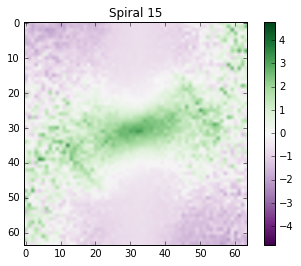

In [49]:
# Making a simple image of the galaxy

galaxyPlot_15=plt.gca()
image_15=galaxyPlot_15.imshow(pixels_15, vmin=-4.8, vmax=4.8, cmap='PRGn')
plt.colorbar(image_15)
plt.title('Spiral 15')
plt.savefig('spiral_15.png')
plt.show(galaxyPlot_15)

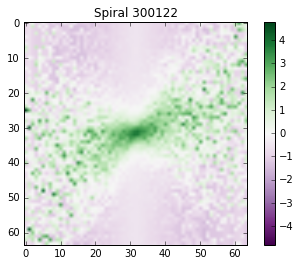

In [50]:
galaxyPlot_122=plt.gca()
image_122=galaxyPlot_122.imshow(pixels_122, vmin=-4.8, vmax=4.8, cmap='PRGn')
plt.colorbar(image_122)
plt.title('Spiral 300122')
plt.savefig('spiral_122.png')
plt.show(galaxyPlot_122)

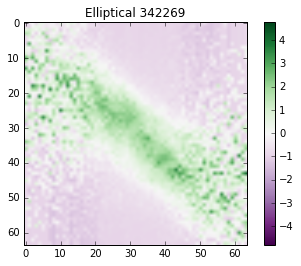

In [51]:
galaxyPlot_260=plt.gca()
image_260=galaxyPlot_260.imshow(pixels_260, vmin=-4.8, vmax=4.8, cmap='PRGn')
plt.colorbar(image_260)
plt.title('Elliptical 342269')
plt.savefig('spiral_260.png')
plt.show(galaxyPlot_260)

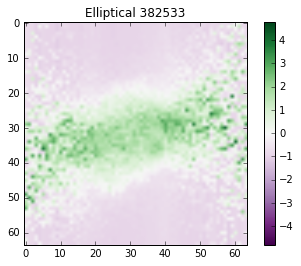

In [52]:
galaxyPlot_533=plt.gca()
image_533=galaxyPlot_533.imshow(pixels_533, vmin=-4.8, vmax=4.8, cmap='PRGn')
plt.colorbar(image_533)
plt.title('Elliptical 382533')
plt.savefig('spiral_533.png')
plt.show(galaxyPlot_533)

In [13]:
#unclassified Galaxy 177131

data_131=getData(177131)

rStar_131=data_131[0][:,:]
vStar_131=data_131[1][:,:]
mStar_131=data_131[2][:]
pStar_131=data_131[3][:,:]
tStar_131=data_131[4][:]
rGas_131=data_131[5][:,:]
volGas_131=data_131[6][:]

com_131, rStar_131=com(mStar_131, rStar_131)

In [14]:
#unclassified Galaxy 200655

data_655=getData(200655)

rStar_655=data_655[0][:,:]
vStar_655=data_655[1][:,:]
mStar_655=data_655[2][:]
pStar_655=data_655[3][:,:]
tStar_655=data_655[4][:]
rGas_655=data_655[5][:,:]
volGas_655=data_655[6][:]

com_655, rStar_655=com(mStar_655, rStar_655)

In [15]:
#unclassified Galaxy 204394

data_394=getData(204394)

rStar_394=data_394[0][:,:]
vStar_394=data_394[1][:,:]
mStar_394=data_394[2][:]
pStar_394=data_394[3][:,:]
tStar_394=data_394[4][:]
rGas_394=data_394[5][:,:]
volGas_394=data_394[6][:]

com_394, rStar_394=com(mStar_394, rStar_394)

In [16]:
#unclassified Galaxy 268841

data_841=getData(268841)

rStar_841=data_841[0][:,:]
mStar_841=data_841[2][:]
tStar_841=data_841[4][:]

com_841, rStar_841=com(mStar_841, rStar_841)

In [17]:
#unclassified Galaxy 273742

data_742=getData(273742)

rStar_742=data_742[0][:,:]
mStar_742=data_742[2][:]
tStar_742=data_742[4][:]

com_742, rStar_742=com(mStar_742, rStar_742)

In [18]:
#unclassified Galaxy 278699

data_699=getData(278699)

rStar_699=data_699[0][:,:]
mStar_699=data_699[2][:]
tStar_699=data_699[4][:]

com_699, rStar_699=com(mStar_699, rStar_699)

In [21]:
#unclassified Galaxy 311141

data_141=getData(311141)

rStar_141=data_141[0][:,:]
mStar_141=data_141[2][:]
tStar_141=data_141[4][:]

com_141, rStar_141=com(mStar_141, rStar_141)

In [23]:
pixels_131=findPixels(rStar_131,tStar_131,64,16)
pixels_655=findPixels(rStar_655,tStar_655,64,16)
pixels_394=findPixels(rStar_394,tStar_394,64,16)
pixels_841=findPixels(rStar_841,tStar_841,64,16)
pixels_742=findPixels(rStar_742,tStar_742,64,16)
pixels_699=findPixels(rStar_699,tStar_699,64,16)
pixels_141=findPixels(rStar_141,tStar_141,64,16)

In [24]:
pixels_131=scaler.fit_transform(pixels_131)
pixels_655=scaler.fit_transform(pixels_655)
pixels_394=scaler.fit_transform(pixels_394)
pixels_841=scaler.fit_transform(pixels_841)
pixels_742=scaler.fit_transform(pixels_742)
pixels_699=scaler.fit_transform(pixels_699)
pixels_141=scaler.fit_transform(pixels_141)

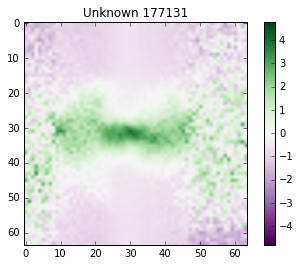

In [48]:
galaxyPlot_131=plt.gca()
image_131=galaxyPlot_131.imshow(pixels_131, vmin=-4.8, vmax=4.8, cmap='PRGn')
plt.colorbar(image_131)
plt.title('Unknown 177131')
plt.savefig('unknown_131.png')
plt.show(galaxyPlot_131)

#recent spiral?

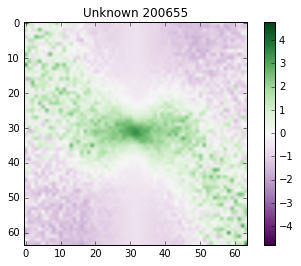

In [42]:
galaxyPlot_655=plt.gca()
image_655=galaxyPlot_655.imshow(pixels_655, vmin=-4.8, vmax=4.8, cmap='PRGn')
plt.colorbar(image_655)
plt.title('Unknown 200655')
plt.savefig('unknown_655.png')
plt.show(galaxyPlot_655)

#spiral

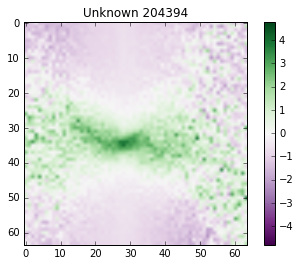

In [43]:
galaxyPlot_394=plt.gca()
image_394=galaxyPlot_394.imshow(pixels_394, vmin=-4.8, vmax=4.8, cmap='PRGn')
plt.colorbar(image_394)
plt.title('Unknown 204394')
plt.savefig('unknown_394.png')
plt.show(galaxyPlot_394)

#spiral?

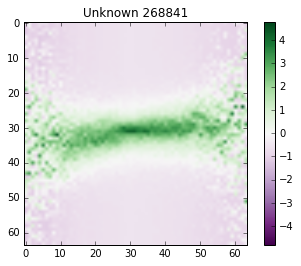

In [44]:
galaxyPlot_841=plt.gca()
image_841=galaxyPlot_841.imshow(pixels_841, vmin=-4.8, vmax=4.8, cmap='PRGn')
plt.colorbar(image_841)
plt.title('Unknown 268841')
plt.savefig('unknown_841.png')
plt.show(galaxyPlot_841)

#Elliptical

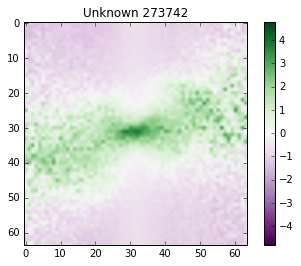

In [45]:
galaxyPlot_742=plt.gca()
image_742=galaxyPlot_742.imshow(pixels_742, vmin=-4.8, vmax=4.8, cmap='PRGn')
plt.colorbar(image_742)
plt.title('Unknown 273742')
plt.savefig('unknown_742.png')
plt.show(galaxyPlot_742)

#spiral

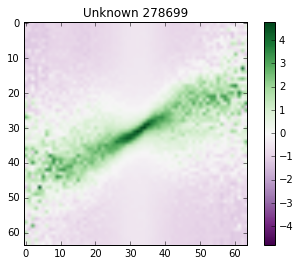

In [46]:
galaxyPlot_699=plt.gca()
image_699=galaxyPlot_699.imshow(pixels_699, vmin=-4.8, vmax=4.8, cmap='PRGn')
plt.colorbar(image_699)
plt.title('Unknown 278699')
plt.savefig('unknown_699.png')
plt.show(galaxyPlot_699)

#spiral?

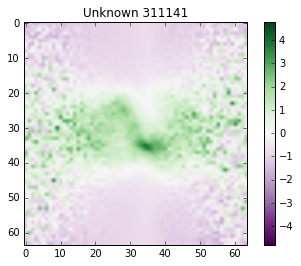

In [47]:
galaxyPlot_141=plt.gca()
image_141=galaxyPlot_141.imshow(pixels_141, vmin=-4.8, vmax=4.8, cmap='PRGn')
plt.colorbar(image_141)
plt.title('Unknown 311141')
plt.savefig('unknown_141.png')
plt.show(galaxyPlot_141)
#Elliptical